## Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from random import randint

2022-08-14 16:41:46.871110: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-14 16:41:46.871138: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## 1. Aquisição dos Dados

In [2]:
mnist = keras.datasets.mnist.load_data()
(X_train, y_train), (X_test, y_test) = mnist

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

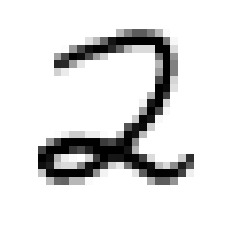

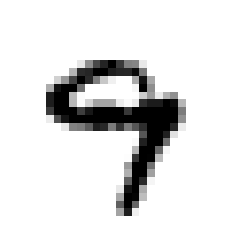

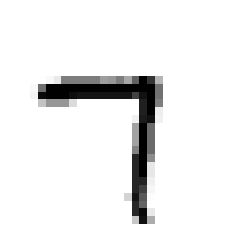

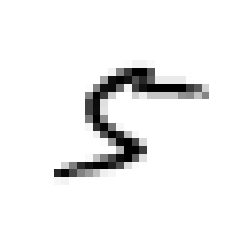

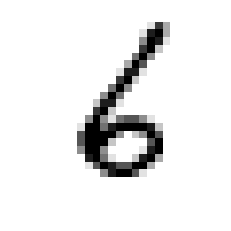

In [5]:
#testar diferentes exemplos
for i in range(5):
    plt.imshow(X_train[randint(0, len(X_train))], cmap="binary")
    plt.axis('off')
    plt.show()

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

??? Não tem como ter class names aqui.

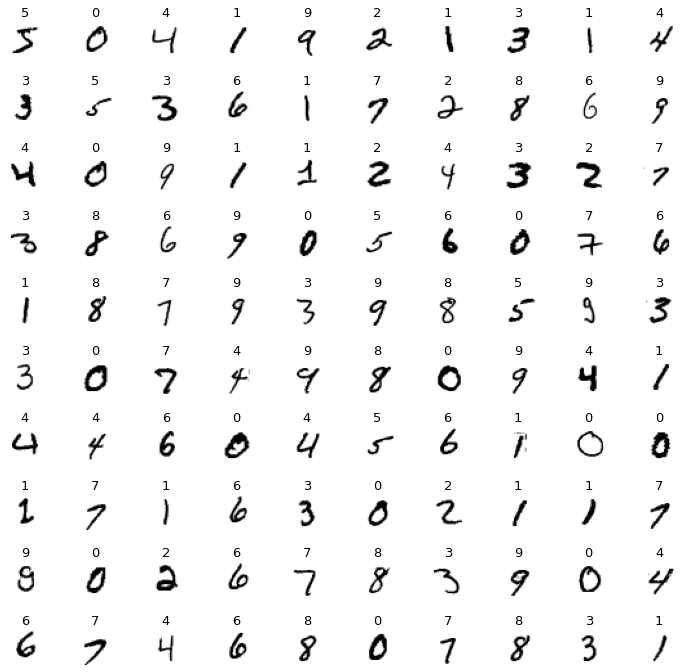

In [7]:
n_rows = 10
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary")
        plt.axis('off')
        plt.title(y_train[index], fontsize=13)
plt.subplots_adjust(wspace=1.0, hspace=0.5)
plt.show()

## 2. Pré-Processamento

In [8]:
# Criar um conj de validação de 5k e mudar a escala dos pixels de 0-255 para 0-1 (float)
X_valid, X_train = X_train[:5000] / 255., X_train[5000:] / 255.
y_valid, y_train = y_train[:5000], y_train[5000:] 
X_test = X_test / 255.

## 3. Construindo a arquitetura

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

2022-08-14 16:42:29.013083: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-14 16:42:29.013136: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-14 16:42:29.013176: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (daniel-Aspire-A315-42G): /proc/driver/nvidia/version does not exist
2022-08-14 16:42:29.014238: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
hidden1 = model.layers[1]

In [13]:
weights, biases = hidden1.get_weights()

In [14]:
weights.shape

(784, 300)

In [15]:
biases.shape

(300,)

In [16]:
hidden2 = model.layers[2]

In [17]:
weights, biases = hidden2.get_weights()

In [18]:
weights.shape

(300, 100)

In [19]:
biases.shape

(100,)

In [20]:
output = model.layers[3]

In [21]:
weights, biases = output.get_weights()

In [22]:
weights.shape

(100, 10)

In [23]:
biases.shape

(10,)

## 4. Treinando a rede

In [24]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


In [25]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


Epoch 1/30


2022-08-14 16:43:24.269128: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


1711/1719 [============================>.] - ETA: 0s - loss: 0.6089 - accuracy: 0.8414

2022-08-14 16:43:32.136802: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 15680000 exceeds 10% of free system memory.


1719/1719 [==============================] - 8s 4ms/step - loss: 0.6076 - accuracy: 0.8417 - val_loss: 0.3040 - val_accuracy: 0.9146
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2887 - accuracy: 0.9173 - val_loss: 0.2437 - val_accuracy: 0.9334
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2369 - accuracy: 0.9332 - val_loss: 0.2032 - val_accuracy: 0.9430
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2028 - accuracy: 0.9419 - val_loss: 0.1802 - val_accuracy: 0.9494
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1765 - accuracy: 0.9494 - val_loss: 0.1591 - val_accuracy: 0.9572
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1560 - accuracy: 0.9558 - val_loss: 0.1462 - val_accuracy: 0.9630
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1398 - accuracy: 0.9601 - val_loss: 0.1314 - val_accuracy: 0.9650
Epo

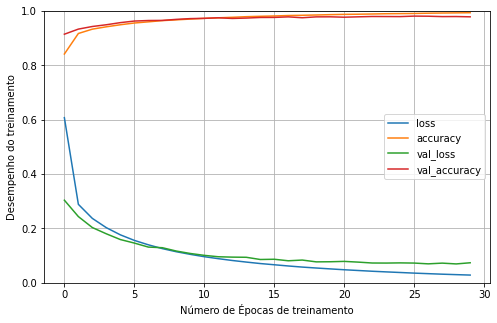

In [26]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.xlabel("Número de Épocas de treinamento")
plt.ylabel("Desempenho do treinamento")
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [27]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid))

Epoch 1/15
  22/1719 [..............................] - ETA: 8s - loss: 0.0242 - accuracy: 0.9957

2022-08-14 16:47:58.253765: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


1708/1719 [============================>.] - ETA: 0s - loss: 0.0268 - accuracy: 0.9939

2022-08-14 16:48:05.651063: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 15680000 exceeds 10% of free system memory.


1719/1719 [==============================] - 8s 4ms/step - loss: 0.0268 - accuracy: 0.9939 - val_loss: 0.0691 - val_accuracy: 0.9800
Epoch 2/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0254 - accuracy: 0.9945 - val_loss: 0.0696 - val_accuracy: 0.9808
Epoch 3/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0239 - accuracy: 0.9952 - val_loss: 0.0703 - val_accuracy: 0.9790
Epoch 4/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0227 - accuracy: 0.9950 - val_loss: 0.0703 - val_accuracy: 0.9792
Epoch 5/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0214 - accuracy: 0.9961 - val_loss: 0.0697 - val_accuracy: 0.9802
Epoch 6/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0204 - accuracy: 0.9962 - val_loss: 0.0696 - val_accuracy: 0.9802
Epoch 7/15
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0193 - accuracy: 0.9964 - val_loss: 0.0689 - val_accuracy: 0.9802
Epo

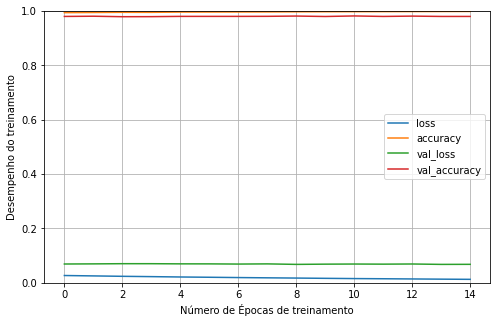

In [28]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.xlabel("Número de Épocas de treinamento")
plt.ylabel("Desempenho do treinamento")
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [29]:
history = model.fit(X_train, y_train, epochs=60, validation_data=(X_valid, y_valid))

Epoch 1/60
  23/1719 [..............................] - ETA: 7s - loss: 0.0116 - accuracy: 0.9986

2022-08-14 16:50:39.448061: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 8s 4ms/step - loss: 0.0122 - accuracy: 0.9985 - val_loss: 0.0687 - val_accuracy: 0.9802
Epoch 2/60
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0116 - accuracy: 0.9985 - val_loss: 0.0687 - val_accuracy: 0.9800
Epoch 3/60
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0110 - accuracy: 0.9989 - val_loss: 0.0679 - val_accuracy: 0.9806
Epoch 4/60
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0106 - accuracy: 0.9988 - val_loss: 0.0690 - val_accuracy: 0.9802
Epoch 5/60
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0100 - accuracy: 0.9991 - val_loss: 0.0700 - val_accuracy: 0.9808
Epoch 6/60
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0096 - accuracy: 0.9991 - val_loss: 0.0695 - val_accuracy: 0.9802
Epoch 7/60
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0091 - accuracy: 0.9991 - val_loss: 0.0702 - val_accuracy: 0.9804
Epo

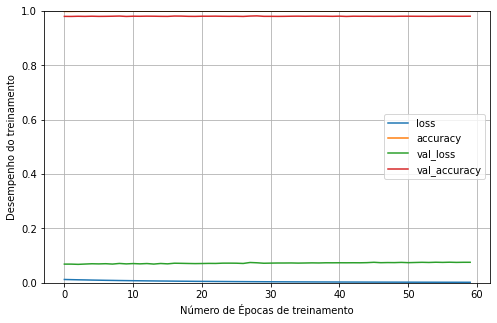

In [30]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.xlabel("Número de Épocas de treinamento")
plt.ylabel("Desempenho do treinamento")
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [31]:
history = model.fit(X_train, y_train, epochs=120, validation_data=(X_valid, y_valid))

Epoch 1/120
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0753 - val_accuracy: 0.9806
Epoch 2/120
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0756 - val_accuracy: 0.9804
Epoch 3/120
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0763 - val_accuracy: 0.9808
Epoch 4/120
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0763 - val_accuracy: 0.9808
Epoch 5/120
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0763 - val_accuracy: 0.9808
Epoch 6/120
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0761 - val_accuracy: 0.9810
Epoch 7/120
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0763 - val_ac

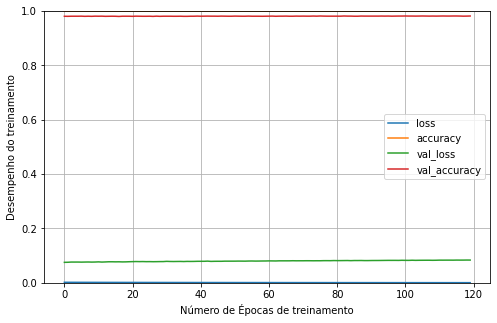

In [32]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.xlabel("Número de Épocas de treinamento")
plt.ylabel("Desempenho do treinamento")
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Testando o modelo

In [33]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0813 - accuracy: 0.9815


[0.08133679628372192, 0.9815000295639038]

In [34]:
X_new = X_test[:10]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 98ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [35]:
# Pega a posição do maior valor na linha
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 27ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [36]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

313/313 [==============================] - 1s 3ms/step


In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score
print('Acurácia: ', accuracy_score(y_test,y_pred))
print('Kappa: ', cohen_kappa_score(y_test,y_pred))
print('Matriz de confusão: \n', confusion_matrix(y_test,y_pred))

Acurácia:  0.9815
Kappa:  0.979436267618992
Matriz de confusão: 
 [[ 968    0    1    0    0    1    4    1    4    1]
 [   0 1122    4    1    0    1    2    1    4    0]
 [   3    2 1010    4    1    0    1    7    4    0]
 [   0    1    3  996    1    3    0    2    2    2]
 [   1    0    2    0  966    0    3    2    0    8]
 [   3    0    0    6    2  873    4    1    2    1]
 [   4    2    2    1    5    2  940    0    2    0]
 [   1    4    7    3    1    0    0 1005    2    5]
 [   3    1    3    4    2    2    3    3  950    3]
 [   2    2    1    6    7    1    0    2    3  985]]


## 6. Salvando o modelo

In [38]:
model.save("modelo_mlp.h5")

In [39]:
model = keras.models.load_model("modelo_mlp.h5")

In [40]:
np.argmax(model.predict(X_test), axis=-1)

313/313 [==============================] - 1s 3ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [41]:
checkpoint = keras.callbacks.ModelCheckpoint("melhor_modelo_mlp.h5", save_best_only=True)

In [42]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid), callbacks=[checkpoint])

Epoch 1/15
1719/1719 [==============================] - 8s 4ms/step - loss: 5.1457e-04 - accuracy: 1.0000 - val_loss: 0.0837 - val_accuracy: 0.9814
Epoch 2/15
1719/1719 [==============================] - 8s 4ms/step - loss: 5.0979e-04 - accuracy: 1.0000 - val_loss: 0.0841 - val_accuracy: 0.9814
Epoch 3/15
1719/1719 [==============================] - 8s 4ms/step - loss: 5.0740e-04 - accuracy: 1.0000 - val_loss: 0.0837 - val_accuracy: 0.9812
Epoch 4/15
1719/1719 [==============================] - 8s 4ms/step - loss: 5.0403e-04 - accuracy: 1.0000 - val_loss: 0.0838 - val_accuracy: 0.9812
Epoch 5/15
1719/1719 [==============================] - 8s 4ms/step - loss: 5.0053e-04 - accuracy: 1.0000 - val_loss: 0.0838 - val_accuracy: 0.9812
Epoch 6/15
1719/1719 [==============================] - 8s 4ms/step - loss: 4.9742e-04 - accuracy: 1.0000 - val_loss: 0.0840 - val_accuracy: 0.9816
Epoch 7/15
1719/1719 [==============================] - 8s 4ms/step - loss: 4.9336e-04 - accuracy: 1.0000 - val_